<html>
<body>

<h1 id="H"> Sentiment Analysis on Movie Reviews</h1>

- <a href="#C1">1. Problem Description</a>
- <a href="#C2">2. Load the Dataset and Have a First Look</a>
- <a href="#C3">3. Preprocessing of Text: Vectorizer</a>
- <a href="#C4">4. Modeling, Evaluation and Improving the Model</a>
- <a href="#C5">5. Predict the Sentiment labels of Sentiment_unknow Set</a>
- <a href="#C6">6. Conclusion</a>

<h2 id="C1">1. Problem Description</h2>

<p>
Opinion mining or sentiment analysis aims to determine the attitude of a critic or customer or other subject with respected to a topic. And in this project, attitude of critics and users towards various movies is what we are concerned. 
</p>
<p>Cognitive insight is important for online streaming or shopping website, because it can help to predict whether customers like or dislike a movie or other products. When they submit a new comment, the website can offer some feedback according to customers’ attitude. And in this project, the data is from kaggle.com.
</p>
<p>And the goal of the project is to produce an algorithm to classify phrases into 5 categories: negative, somewhat negative, neutral, somewaht postive and positive.
</p>

In [108]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
senti_known= pd.read_csv('train.tsv/train.tsv',delimiter='\t',encoding='utf-8')
senti_unknown = pd.read_csv('test.tsv/test.tsv',delimiter='\t',encoding='utf-8')

<h2 id='C2'>2. Load the Dataset and Have a First Look</h2>

### 2.1 Data set with sentiment labels

In [78]:
senti_known.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [79]:
senti_known.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


### 2.2 Five sentiment levels

In [81]:
Sentiment = set()
for i in senti_known.Sentiment:
    Sentiment.add(i)
print(Sentiment)

{0, 1, 2, 3, 4}


- 0 : negative
- 1 : somewhat negative
- 2 : neutral
- 3 : somewhat positive
- 4 : positive

(array([  7072.,      0.,  27273.,      0.,      0.,  79582.,      0.,
         32927.,      0.,   9206.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

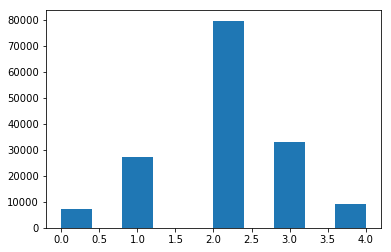

In [82]:
plt.hist(senti_known.Sentiment)

### 2.3 Most Common Words

In [84]:
import string
from collections import Counter
from nltk.corpus import stopwords

translator = str.maketrans('', '', string.punctuation)
def get_tokens(text):
    #remove the punctuation using the character deletion step of translate
    text_lower=text.lower()
    no_punctuation = text_lower.translate(translator)
    tokens = nltk.word_tokenize(no_punctuation)
    return tokens

tokens=list()
for text in senti_known.Phrase:
    token = get_tokens(text)
    tokens.extend(token)
    
count = Counter(tokens)
print(count.most_common(10))

[('the', 51220), ('a', 36130), ('of', 32308), ('and', 31763), ('to', 22448), ('s', 17002), ('in', 13745), ('is', 13447), ('that', 12327), ('it', 11677)]


In [85]:
print('There are {} tokens in the text:'.format(len(tokens)))

There are 1047954 tokens in the text:


In [86]:
token_set=set()
for token in tokens:
    token_set.add(token)
print('There are {} types in the text:'.format(len(token_set)))

There are 16402 types in the text:


In [88]:
filtered = [w for w in tokens if not w in stopwords.words('english')]
count = Counter(filtered)
print(count.most_common(100))

[('film', 6689), ('movie', 5905), ('nt', 3970), ('one', 3609), ('like', 3071), ('story', 2520), ('rrb', 2438), ('lrb', 2098), ('good', 2043), ('characters', 1882), ('much', 1862), ('time', 1747), ('comedy', 1721), ('even', 1597), ('little', 1575), ('funny', 1522), ('way', 1511), ('life', 1484), ('make', 1396), ('movies', 1345), ('love', 1296), ('new', 1278), ('enough', 1248), ('work', 1243), ('us', 1234), ('bad', 1211), ('something', 1152), ('would', 1118), ('never', 1114), ('director', 1099), ('many', 1094), ('people', 1073), ('made', 1060), ('best', 1059), ('two', 1032), ('makes', 1019), ('action', 1005), ('may', 986), ('plot', 979), ('films', 979), ('could', 969), ('character', 968), ('see', 957), ('well', 944), ('world', 917), ('better', 913), ('audience', 912), ('drama', 894), ('look', 888), ('really', 888), ('without', 872), ('sense', 869), ('every', 849), ('great', 838), ('humor', 827), ('long', 821), ('first', 819), ('another', 818), ('feel', 808), ('get', 805), ('minutes', 802

In [89]:
txt = ''
for token in filtered:
    txt += (token+' ')

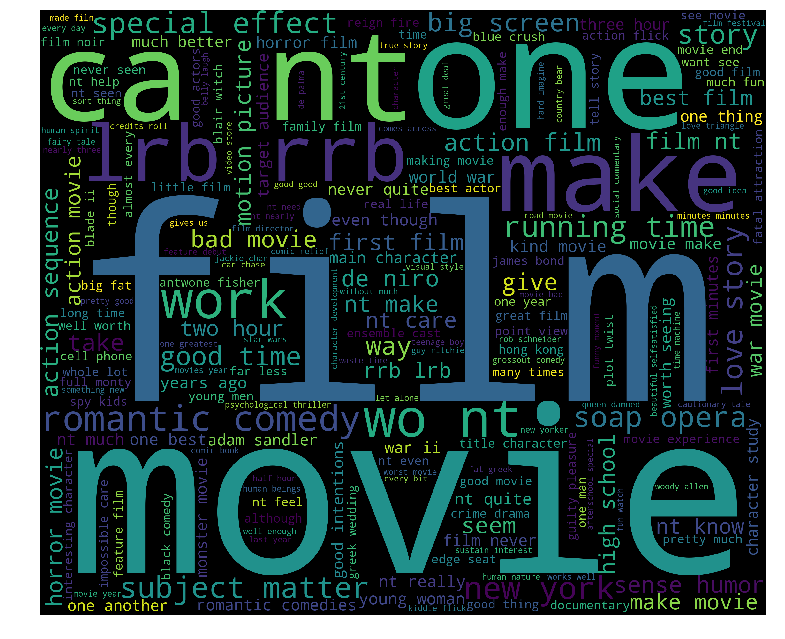

In [90]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(txt)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 2.4 Data set without sentiment labels

In [91]:
senti_unknown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
PhraseId      66292 non-null int64
SentenceId    66292 non-null int64
Phrase        66292 non-null object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [92]:
senti_unknown.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


<h2 id='C2'>3. Preprocessing of Text: Vectorizer</h2>

In [157]:
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
stop = nltk.corpus.stopwords.words('english')
stemmer = PorterStemmer()

analyzer = CountVectorizer(stop_words= "english",ngram_range=(1,2)).build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

stem_count_vectorizer1 = CountVectorizer(analyzer=stemmed_words)

In [158]:
# Create a series to store the labels: y
y = senti_known['Sentiment']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(senti_known.Phrase,y,test_size=0.33,random_state=53)

# Transform the training data using only the 'text' column values: count_train 
stem_count_train1 = stem_count_vectorizer1.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
stem_count_test1 = stem_count_vectorizer1.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(stem_count_vectorizer1.get_feature_names()[:10])

['000', '000 leagu', '000 time', '10', '10 000', '10 15', '10 cours', '10 minut', '10 powerpuff', '10 second']


In [159]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(stem_count_train1,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(stem_count_test1)
print(pred)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print(score)


[1 3 2 ..., 2 3 2]
0.615980582524


### 3.1 Stemmed Count Vectorizer with ngram_range=(1,2)

In [160]:
analyzer_count1 = CountVectorizer(stop_words= "english",ngram_range=(1,2)).build_analyzer()

def stemmed_words_count1(doc):
    return (stemmer.stem(w) for w in analyzer_count1(doc))

# Create a stem_count_vectorizer with stemmed analyzer and ngram_range=(1,2)
stem_count_vectorizer1 = CountVectorizer(analyzer=stemmed_words_count1)

# Create a series to store the labels: y
y = senti_known['Sentiment']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(senti_known.Phrase,y,test_size=0.33,random_state=53)

# Transform the training data using only the 'text' column values: count_train 
stem_count_train1 = stem_count_vectorizer1.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
stem_count_test1 = stem_count_vectorizer1.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(stem_count_vectorizer1.get_feature_names()[:10])

['000', '000 leagu', '000 time', '10', '10 000', '10 15', '10 cours', '10 minut', '10 powerpuff', '10 second']


### 3.2 Count Vectorizer with ngram_range=(3,4)

In [161]:
analyzer_count2 = CountVectorizer(stop_words= "english",ngram_range=(3,4)).build_analyzer()

def stemmed_words_count2(doc):
    return (stemmer.stem(w) for w in analyzer_count2(doc))

# Create a stem_count_vectorizer with stemmed analyzer and ngram_range=(3,4)
stem_count_vectorizer2 = CountVectorizer(analyzer=stemmed_words_count2)

# Transform the training data using only the 'text' column values: count_train 
stem_count_train2 = stem_count_vectorizer2.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
stem_count_test2 = stem_count_vectorizer2.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(stem_count_vectorizer2.get_feature_names()[:10])

['000 leagues sea', '000 leagues sea georg', '10 000 time', '10 15 minut', '10 15 minutes cut', '10 15 minutes wendigo', '10 course banquet', '10 minutes film', '10 minutes film l', '10 minutes past']


In [124]:
count_vectorizer2 = CountVectorizer(stop_words= "english",ngram_range=(3,4))

# Transform the training data using only the 'text' column values: count_train 
count_train2 = count_vectorizer2.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test2 = count_vectorizer2.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer2.get_feature_names()[:10])

['000 leagues sea', '000 leagues sea george', '10 000 times', '10 15 minutes', '10 15 minutes cut', '10 15 minutes wendigo', '10 course banquet', '10 minutes film', '10 minutes film ll', '10 minutes past']


### 3.3 Tfidf Vectorizer with ngram_range=(1,2)

In [163]:
analyzer_tfidf1 = TfidfVectorizer(stop_words='english',ngram_range=(1,2)).build_analyzer()

def stemmed_words_tfidf1(doc):
    return (stemmer.stem(w) for w in analyzer_tfidf1(doc))


In [164]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
stem_tfidf_vectorizer1 = TfidfVectorizer(analyzer=stemmed_words_tfidf1)

# Transform the training data: tfidf_train 
stem_tfidf_train1 = stem_tfidf_vectorizer1.fit_transform(X_train)

# Transform the test data: tfidf_test 
stem_tfidf_test1 = stem_tfidf_vectorizer1.transform(X_test)

# Print the first 10 features
print(stem_tfidf_vectorizer1.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(stem_tfidf_train1[:5])

['000', '000 leagu', '000 time', '10', '10 000', '10 15', '10 cours', '10 minut', '10 powerpuff', '10 second']
  (0, 8585)	0.366798276603
  (0, 23745)	0.315740695958
  (0, 38632)	0.349216964956
  (0, 8656)	0.610263702704
  (0, 23839)	0.520953512077
  (1, 10585)	0.403947486736
  (1, 50758)	0.434251003349
  (1, 24347)	0.334760611322
  (1, 10593)	0.52104577577
  (1, 50762)	0.51448919008
  (2, 28876)	0.438240267866
  (2, 2107)	0.309206465784
  (2, 61114)	0.357689484954
  (2, 28880)	0.550450098616
  (2, 2162)	0.530471253157
  (3, 40576)	0.61894944091
  (3, 51834)	0.418435999135
  (3, 40579)	0.664690081335
  (4, 46559)	1.0


### 3.4 Tfidf Vectorizer with ngram_range=(3,4)

In [165]:
analyzer_tfidf2 = TfidfVectorizer(stop_words='english',ngram_range=(3,4)).build_analyzer()

def stemmed_words_tfidf2(doc):
    return (stemmer.stem(w) for w in analyzer_tfidf2(doc))


In [166]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
stem_tfidf_vectorizer2 = TfidfVectorizer(analyzer=stemmed_words_tfidf2)

# Transform the training data: tfidf_train 
stem_tfidf_train2 =  stem_tfidf_vectorizer2.fit_transform(X_train)

# Transform the test data: tfidf_test 
stem_tfidf_test2 = stem_tfidf_vectorizer2.transform(X_test)

# Print the first 10 features
print(stem_tfidf_vectorizer2.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(stem_tfidf_train2[:5])

['000 leagues sea', '000 leagues sea georg', '10 000 time', '10 15 minut', '10 15 minutes cut', '10 15 minutes wendigo', '10 course banquet', '10 minutes film', '10 minutes film l', '10 minutes past']
  (0, 12370)	1.0
  (1, 15232)	1.0
  (2, 42503)	1.0


<h2 id='C4'>4. Modeling, Evaluation and Improving the Model</h2>

### 4.1 Train and evaluate the multinomial naive bayes model by the training data with count vectorier

In [167]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(stem_count_train1,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(stem_count_test1)
print(pred)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print(score)

# Calculate the confusion matrix: cm
cm =  metrics.confusion_matrix(y_test,pred,labels=[0,1,2,3,4])
print(cm)


[1 3 2 ..., 2 3 2]
0.615980582524
[[  850  1080   340    42     3]
 [  814  4321  3559   401    37]
 [  282  2672 19781  3147   301]
 [   44   392  3765  5562  1018]
 [    4    44   349  1483  1209]]


### 4.2 Improving the model of 4.1 by tweaking alpha level 

In [168]:
# Create the list of alphas: alphas
alphas = np.arange(0,5,0.1)

# Define train_and_predict()
def train_and_predict(alpha,count_train,count_test):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(count_train,y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(count_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test,pred)
    return score

print('ngram_range=(1,2)')
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha,stem_count_train1,stem_count_test1))

print('ngram_range=(3,4)')
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha,stem_count_train2,stem_count_test2))


ngram_range=(1,2)
Alpha:  0.0
Score:  0.570718446602
Alpha:  0.1
Score:  0.580038834951
Alpha:  0.2


C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.585786407767
Alpha:  0.3
Score:  0.591223300971
Alpha:  0.4
Score:  0.597165048544
Alpha:  0.5
Score:  0.601339805825
Alpha:  0.6
Score:  0.605514563107
Alpha:  0.7
Score:  0.608970873786
Alpha:  0.8
Score:  0.61172815534
Alpha:  0.9
Score:  0.613553398058
Alpha:  1.0
Score:  0.615980582524
Alpha:  1.1
Score:  0.617029126214
Alpha:  1.2
Score:  0.618213592233
Alpha:  1.3
Score:  0.619689320388
Alpha:  1.4
Score:  0.620601941748
Alpha:  1.5
Score:  0.621242718447
Alpha:  1.6
Score:  0.62227184466
Alpha:  1.7
Score:  0.622776699029
Alpha:  1.8
Score:  0.622757281553
Alpha:  1.9
Score:  0.623203883495
Alpha:  2.0
Score:  0.622757281553
Alpha:  2.1
Score:  0.622504854369
Alpha:  2.2
Score:  0.622873786408
Alpha:  2.3
Score:  0.622815533981
Alpha:  2.4
Score:  0.622737864078
Alpha:  2.5
Score:  0.622621359223
Alpha:  2.6
Score:  0.622291262136
Alpha:  2.7
Score:  0.621825242718
Alpha:  2.8
Score:  0.621436893204
Alpha:  2.9
Score:  0.621165048544
Alpha:  3.0
Score:  0.621126213592

According to the outcome above, best alpha of multinomial NB is 1.9 for countvectorizer and (1,2) is a better ngram_range, and best score is 0.623

### 4.3 Train and evaluate the multinomial naive bayes model by the training data with tfidf vectorier

In [169]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(stem_tfidf_train1,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(stem_tfidf_test1)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred,labels=[0,1,2,3,4])
print(cm)


0.601262135922
[[   89   969  1227    30     0]
 [   30  2410  6518   174     0]
 [    4   800 24121  1254     4]
 [    0    83  6460  4185    53]
 [    0     6  1121  1802   160]]


### 4.4 Improving the model of 4.3 by tweaking alpha level

In [170]:
# Create the list of alphas: alphas
alphas = np.arange(0,1,0.02)

# Define train_and_predict()
def train_and_predict(alpha,tfidf_train,tfidf_test):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train,y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test,pred)
    return score

print('ngram_range=(1,2)')
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha,stem_tfidf_train1,stem_tfidf_test1))
    print()

print('ngram_range=(3,4)')
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha,stem_tfidf_train2,stem_tfidf_test2))
    print()


ngram_range=(1,2)
Alpha:  0.0
Score:  0.611242718447

Alpha:  0.02
Score:  0.617184466019

Alpha:  0.04


C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.620213592233

Alpha:  0.06
Score:  0.622563106796

Alpha:  0.08
Score:  0.624466019417

Alpha:  0.1
Score:  0.626038834951

Alpha:  0.12
Score:  0.626563106796

Alpha:  0.14
Score:  0.627922330097

Alpha:  0.16
Score:  0.629165048544

Alpha:  0.18
Score:  0.628893203883

Alpha:  0.2
Score:  0.629223300971

Alpha:  0.22
Score:  0.629436893204

Alpha:  0.24
Score:  0.629359223301

Alpha:  0.26
Score:  0.629165048544

Alpha:  0.28
Score:  0.629145631068

Alpha:  0.3
Score:  0.629572815534

Alpha:  0.32
Score:  0.628504854369

Alpha:  0.34
Score:  0.628466019417

Alpha:  0.36
Score:  0.628368932039

Alpha:  0.38
Score:  0.628019417476

Alpha:  0.4
Score:  0.627242718447

Alpha:  0.42
Score:  0.626310679612

Alpha:  0.44
Score:  0.62586407767

Alpha:  0.46
Score:  0.625300970874

Alpha:  0.48
Score:  0.625048543689

Alpha:  0.5
Score:  0.624097087379

Alpha:  0.52
Score:  0.623165048544

Alpha:  0.54
Score:  0.622291262136

Alpha:  0.56
Score:  0.621281553398

Alpha:  0.58
Score: 

According to the outcome above, best alpha of multinomial NB is 0.3 for tfidfvectorizer with (1,2) ngram_range, and best score is 0.63.

### 4.5  Inspect the model and explore the vector weights of actual words

In [171]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = count_vectorizer1.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

0 [(-11.307602898881024, '000 leagues'), (-11.307602898881024, '10 course'), (-11.307602898881024, '10 powerpuff'), (-11.307602898881024, '10 unlikely'), (-11.307602898881024, '100 year'), (-11.307602898881024, '100 years'), (-11.307602898881024, '101'), (-11.307602898881024, '101 minutes'), (-11.307602898881024, '104 minutes'), (-11.307602898881024, '105'), (-11.307602898881024, '105 minutes'), (-11.307602898881024, '10th film'), (-11.307602898881024, '10th grade'), (-11.307602898881024, '11'), (-11.307602898881024, '11 new'), (-11.307602898881024, '11 philosophical'), (-11.307602898881024, '11 sum'), (-11.307602898881024, '11 years'), (-11.307602898881024, '112'), (-11.307602898881024, '12 shot')]
1 [(-8.3156111827937913, 'achievement'), (-8.313258721623658, 'looking exit'), (-8.2866104152944811, 'group people'), (-8.2633149013409284, 'shines like'), (-8.2520538837551243, 'attempts wear'), (-8.2266943185196748, 'offbeat sensibilities'), (-8.2106831320832931, 'sound convincing'), (-8.

In [175]:
from sklearn.svm import SVC

# Create a support vector classifier
clf = SVC(1)

# Fit the classifier using the training data
clf.fit(stem_count_train1,y_train)

# Predict the labels of the test set
y_pred = clf.predict(stem_count_test1)
        
from sklearn import metrics
score = metrics.accuracy_score(y_test,y_pred)
print(score)


0.50840776699


In [ ]:
# Calculate the confusion matrix: cm
cm =  metrics.confusion_matrix(y_test,y_pred,labels=[0,1,2,3,4])
print(cm)

<h2 id='C5'> 5. Predict the Sentiment labels of Sentiment_unknow Set</h2>

[3 3 2 ..., 2 2 2]


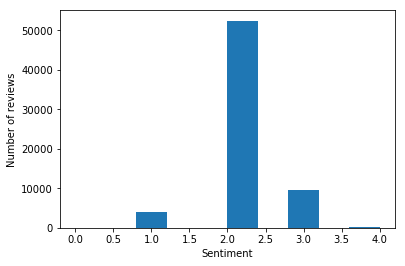

In [172]:
X_senti_unknown = senti_unknown.Phrase
count_senti_unknown = count_vectorizer1.transform(X_senti_unknown)
# Instantiate the classifier: nb_classifier
nb_classifier = MultinomialNB(alpha=2.4)
# Fit to the training data
nb_classifier.fit(count_train1,y_train)
pred_senti_unknown = nb_classifier.predict(count_senti_unknown)
print(pred_senti_unknown)
_ = plt.hist(pred_senti_unknown)
plt.xlabel('Sentiment')
plt.ylabel('Number of reviews')

<h2 id='C6'>6. Conclusion</h2>
<p>In this project, a mutilnomial model is built to analyze the sentiment of moie reviews. Compared with count vectoriser, tfidf vectoriser is a better choice. And best alpha is 3.0 for the model trained by data with tfidf vectorizer(ngram_range=(1,2)), while it's 1.9 for count vectoriser. And best accuracy score with this model is 0.63. </p>

</html>
</body>